# Семинар 2: разбор задач

Задача 1 (Проверить, является ли список циклическим):
Дан односвязный список. 
Необходимо проверить, является ли этот список циклическим.
Примечание: Циклическим (кольцевым) списком называется список, у которого последний узел ссылается на один из предыдущих узлов.

In [111]:
def hasCycle(head):
    if (not head) or (not head.get('next')):
        return False

    slow = head
    fast = head['next']

    while slow != fast:
        if (not fast) or (not fast.get('next')):
            return False
        slow = slow['next']
        fast = fast['next'].get('next')

    return True

#тест
# 1 -> 2 -> 3 -> 4 -> 2 (цикл); используем словари
node1 = {'val': 1, 'next': None}   # пока Nove, чуть ниже заполним их
node2 = {'val': 2, 'next': None}   # аналогично
node3 = {'val': 3, 'next': None}   # аналогично
node4 = {'val': 4, 'next': node2}  # а здесь цикл
node1['next'] = node2
node2['next'] = node3
node3['next'] = node4

print(f"Список зациклен? Ответ: {hasCycle(node1)}")  #должно быть True

Список зациклен? Ответ: True


Задача 2 (Развернуть односвязный список): 
Необходимо написать функцию, которая принимает на вход односвязный список и разворачивает его.

In [113]:
def reverseLinkedList(head):
    prev = None
    current = head

    while current != None:
        next_node = current.get('next')
        current['next'] = prev
        prev = current
        current = next_node

    head = prev
    return head


# для печати списка
def printList(head):
    current = head
    while current:
        print(current['val'], end=" -> " if current['next'] else "\n")
        current = current['next']

# тест
# 1 -> 2 -> 3 -> 4; используем словари
node1 = {'val': 1, 'next': None} # пока Nove, чуть ниже заполним их
node2 = {'val': 2, 'next': None} # аналогично
node3 = {'val': 3, 'next': None} # аналогично
node4 = {'val': 4, 'next': None} # аналогично
node1['next'] = node2
node2['next'] = node3
node3['next'] = node4

printList(reverseLinkedList(node1))

4 -> 3 -> 2 -> 1


Задача 3 (Найти середину списка):
Дан связный список. 
Необходимо найти середину списка. Сделать это необходимо за O(n) без дополнительных аллокаций.

In [115]:
def middleNode(head): # что-то в духе №1
    slow, fast = head, head

    while (fast != None) and (fast.get('next') != None):
        slow = slow.get('next')
        fast = fast.get('next').get('next')

    return slow

# тест для нечетного числа элементов
# 1 -> 2 -> 3 -> 4 -> 5
node1 = {'val': 1, 'next': None}
node2 = {'val': 2, 'next': None}
node3 = {'val': 3, 'next': None}
node4 = {'val': 4, 'next': None}
node5 = {'val': 5, 'next': None}
node1['next'] = node2
node2['next'] = node3
node3['next'] = node4
node4['next'] = node5

print(f"Средний узел: {middleNode(node1)['val']}") # ответ: 3


# тест для четного числа элементов
# 1 -> 2 -> 3 -> 4
node4['next'] = None
print(f"Средний узел: {middleNode(node1)['val']}") # ответ: 3

Средний узел: 3
Средний узел: 3


Задача 4 (Удалить элемент из односвязного списка): 
Необходимо написать функцию, которая принимает на вход односвязный список и некоторое целое число val. Необходимо удалить узел из списка, значение которого равно val.

In [117]:
def removeElements(head, val):
    # фиктивный узел, для безопасности при удалении первого узла (если понадобится)
    dummy = {'next': head}
    prev = dummy
    cur = head

    while cur:
        if cur['val'] == val:
            prev['next'] = cur['next'] #пропускаем текущий узел
        else:
            prev = cur                 # перемещаем prev
        cur = cur['next']

    return dummy['next']

# тест
# 1 -> 2 -> 3 -> 4 -> 5; удаляем элемент со значением 3
node1 = {'val': 1, 'next': None}
node2 = {'val': 2, 'next': None}
node3 = {'val': 3, 'next': None}
node4 = {'val': 4, 'next': None}
node5 = {'val': 5, 'next': None}
node1['next'] = node2
node2['next'] = node3
node3['next'] = node4
node4['next'] = node5

print("Исходный список:")
printList(node1)

new_head = removeElements(node1, 3)
print("Список после удаления:")
printList(new_head)

Исходный список:
1 -> 2 -> 3 -> 4 -> 5
Список после удаления:
1 -> 2 -> 4 -> 5


Задача 5 (Является ли одна строка исходной для другой):
В исходную строку добавили некоторое количество символов. 
Необходимо выявить, была ли строка а исходной для строки b.

In [119]:
def isSubsequence(a, b): #решение через указатели
    i, j = 0, 0

    while (i < len(a)) and (j < len(b)):
        if a[i] == b[j]:
            i += 1
        j += 1

    return i == len(a)

# тест 1
a = "abc"
b = "aebbc"
print(f"Ответ: {isSubsequence(a, b)}")  # True

# тест 2
a = "axc"
b = "aebbc"
print(f"Ответ: {isSubsequence(a, b)}")  # False

Ответ: True
Ответ: False


Задача 6 (Является ли слово палиндромом): 
Напишите функцию, которая принимает на вход строку и возвращает true, если она является палиндромом. В противном случае верните false.

In [121]:
def isPalindrome(s):
    left = 0
    right = len(s) - 1
    while left < right:
        if s[left] != s[right]:
            return False
        left += 1
        right -= 1
    return True

#тесты
print(f"Ответ: {isPalindrome("radar")}")  #True
print(f"Ответ: {isPalindrome("hello")}")  #False
print(f"Ответ: {isPalindrome("leel")}")   #True

Ответ: True
Ответ: False
Ответ: True


Задача 7 (Слияние двух отсортированных списков): 
Написать функцию, которая принимает на вход два отсортированных односвязных списка и объединяет их в один отсортированный список; при этом затраты по памяти должны быть O(1).

In [137]:
def merge_two_sorted_lists(arr1, arr2):
    # фиктивный узел для безопасности
    dummy = {'next': None}
    current = dummy
    p1, p2 = arr1, arr2  #это указатели на начало каждого списка

    while (p1 != None) and (p2 != None):
        if p1['val'] < p2['val']:
            current['next'] = p1
            p1 = p1['next']
        else:
            current['next'] = p2
            p2 = p2['next']
        current = current['next']

    # остатки
    if p1 != None:
        current['next'] = p1
    else:
        current['next'] = p2

    return dummy['next']

# Т Е С Т
node1 = {'val': 1, 'next': None}
node2 = {'val': 3, 'next': None}
node3 = {'val': 5, 'next': None}
node1['next'] = node2
node2['next'] = node3

node4 = {'val': 3, 'next': None}
node5 = {'val': 4, 'next': None}
node6 = {'val': 8, 'next': None}
node4['next'] = node5
node5['next'] = node6

printList(merge_two_sorted_lists(node1, node4))

1 -> 3 -> 3 -> 4 -> 5 -> 8


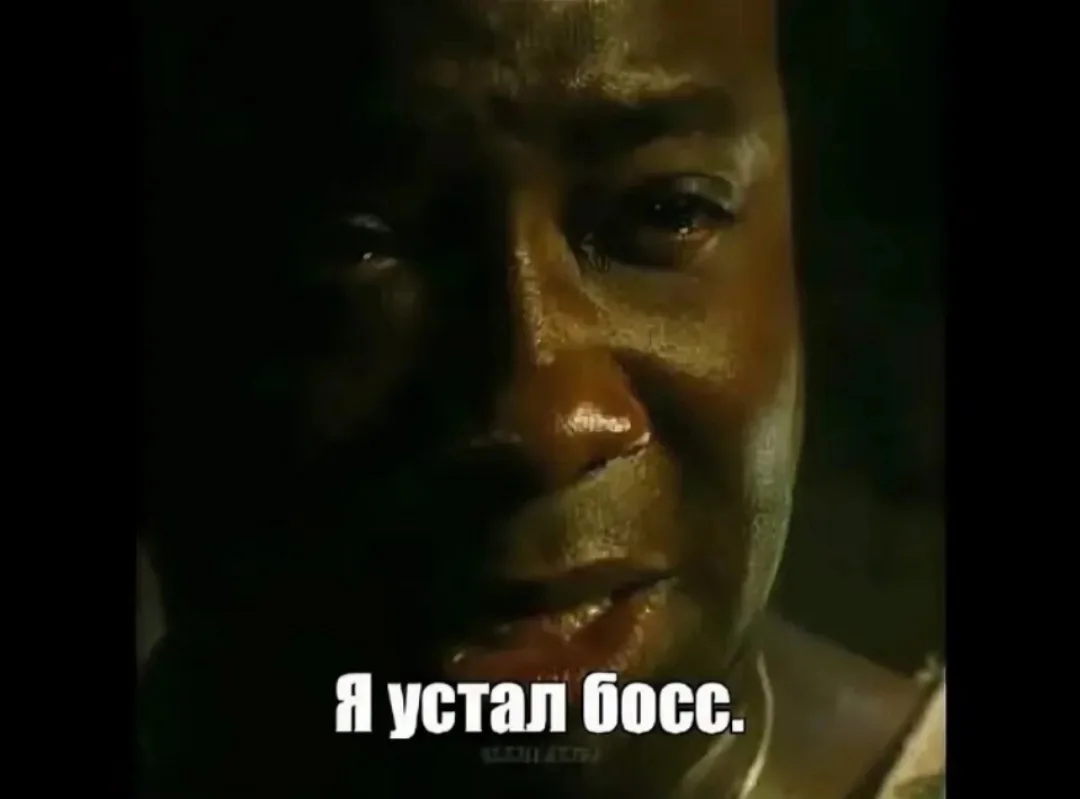